# Instalando as libs

In [5]:
%pip install pandas
%pip install numpy
%pip install keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Carregando o conjunto de dados CIFAR-100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# Normalizando os valores dos pixels das imagens para o intervalo [0, 1]
X_train, X_test = X_train / 255, X_test / 255

# Achatar os rótulos para vetores unidimensionais
y_train, y_test = y_train.flatten(), y_test.flatten()

# Imprimindo as formas dos conjuntos de dados de treinamento e teste
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [8]:
# Determinando o número de classes no conjunto de dados de treinamento
k = len(set(y_train))
k

# Configurando o ImageDataGenerator para augmentação de dados
datagen = ImageDataGenerator(
    rotation_range=15,              # Rotaciona as imagens aleatoriamente até 15 graus
    width_shift_range=0.1,          # Desloca as imagens horizontalmente até 10% da largura
    height_shift_range=0.1,         # Desloca as imagens verticalmente até 10% da altura
    shear_range=0.1,                # Aplica cisalhamento (shear) nas imagens até 10%
    zoom_range=0.1                  # Aplica zoom nas imagens até 10%
)

# Ajusta o ImageDataGenerator aos dados de treinamento
datagen.fit(X_train)


In [9]:
# Definindo a entrada do modelo com a forma das imagens
i = Input(shape=X_train[0].shape)

# Primeira camada convolucional
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)  # Normalização em lote após a convolução
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)  # Normalização em lote após a segunda convolução
x = MaxPooling2D((2, 2))(x)  # Reduz a dimensão espacial com max pooling

# Segunda camada convolucional
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)  # Normalização em lote
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)  # Normalização em lote
x = MaxPooling2D((2, 2))(x)  # Reduz a dimensão espacial

# Terceira camada convolucional
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)  # Normalização em lote
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)  # Normalização em lote
x = MaxPooling2D((2, 2))(x)  # Reduz a dimensão espacial

# Camadas densas e de dropout
x = Flatten()(x)  # Achata a saída das camadas convolucionais para camadas densas
x = Dropout(0.15)(x)  # Adiciona dropout para regularização
x = Dense(1024, activation='relu')(x)  # Camada densa com 1024 neurônios e ativação ReLU
x = Dropout(0.15)(x)  # Adiciona dropout para regularização
x = Dense(k, activation='softmax')(x)  # Camada de saída com k neurônios (uma para cada classe) e ativação softmax

# Criação do modelo com a entrada e a camada de saída
model = Model(i, x)

In [10]:
# Compilando o modelo com o otimizador Adam e a função de perda sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo com os dados de treinamento e validação por 8 épocas
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)

Epoch 1/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 51ms/step - accuracy: 0.1190 - loss: 4.0191 - val_accuracy: 0.2514 - val_loss: 3.1466
Epoch 2/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.3105 - loss: 2.7146 - val_accuracy: 0.2806 - val_loss: 2.9958
Epoch 3/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.4106 - loss: 2.2383 - val_accuracy: 0.4234 - val_loss: 2.1771
Epoch 4/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4822 - loss: 1.9033 - val_accuracy: 0.4643 - val_loss: 2.0071
Epoch 5/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.5404 - loss: 1.6445 - val_accuracy: 0.4289 - val_loss: 2.2520
Epoch 6/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.6012 - loss: 1.4040 - val_accuracy: 0.4848 - val_loss: 2.0136
Epoch 7/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6605 - loss: 1.1565 - val_accuracy: 0.4777 - val_loss: 2.0978
Epoch 8/8
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7236 - loss: 0

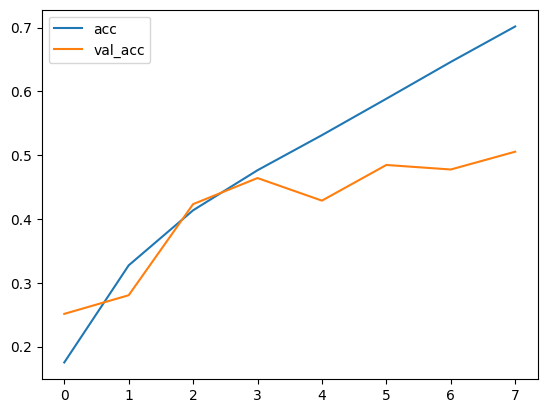

In [11]:

# Importando matplotlib para visualização
import matplotlib.pyplot as plt

# Plotando a acurácia de treinamento e validação ao longo das épocas
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
[7]


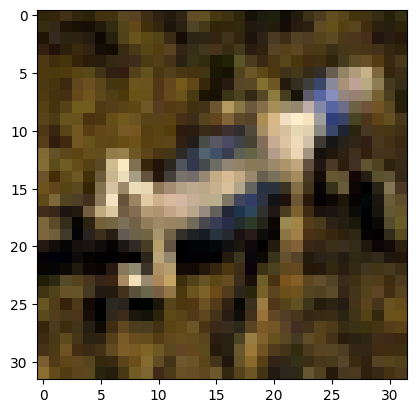

In [12]:

# Importando array_to_img do keras para conversão de arrays para imagens
from keras.preprocessing.image import array_to_img

# Selecionando uma imagem de teste do conjunto de dados de treinamento
test = (X_train[2534])

# Prevendo a classe da imagem selecionada e exibindo a classe prevista
print(np.argmax(model.predict(test.reshape(1, 32, 32, 3)), axis=1))

# Convertendo o array da imagem para uma imagem e exibindo-a
img = array_to_img(test)
plt.imshow(img)
plt.show()